## Working with MNIST DATASET


In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False)

c:\Users\agarw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


fetch_openml returns data as pd dataframe which is not ideal for images so as_frame=false


In [2]:
x,y=mnist.data,mnist.target
print(x)
x.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(70000, 784)

In [3]:
y


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [4]:
y.shape

(70000,)

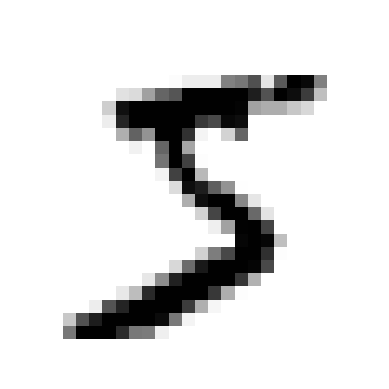

5


In [5]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')


some_digit=x[0]
plot_digit(some_digit)
plt.show()
print(y[0])

spliting the test and train dataset


In [6]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

## Training a Binary Classifier


In [7]:
y_train_5=(y_train=='5')
y_test_5=y_test=='5'


## SGD


In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

cross validation


In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier()
dummy_clf.fit(x_train,y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [12]:
cross_val_score(dummy_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

## Confusion matrices

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [15]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [16]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

Adjusting the threshold value


In [18]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [19]:
threshhold=0
y_some_digit_pred=(y_scores>threshhold)
y_some_digit_pred

array([ True])

In [20]:
threshhold=3000
y_some_digit_pred=(y_scores>threshhold)
y_some_digit_pred

array([False])

In [21]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method='decision_function')

In [22]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,threshholds=precision_recall_curve(y_train_5,y_scores)

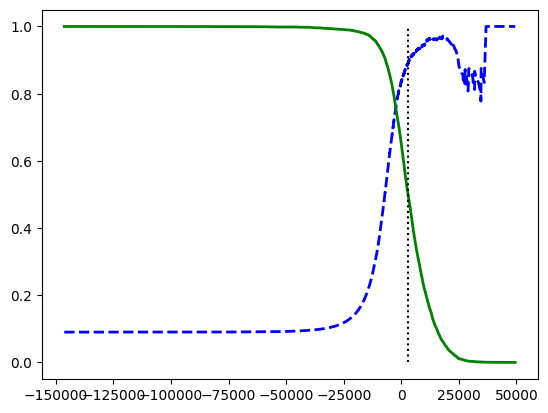

In [23]:
plt.plot(threshholds,precisions[:-1],'b--',label='precsion',linewidth=2)
plt.plot(threshholds,recalls[:-1],'g-',label='recall',linewidth=2)
plt.vlines(threshhold,0,1.0,'k','dotted',label='threshold')
plt.show()

## precision recall curve

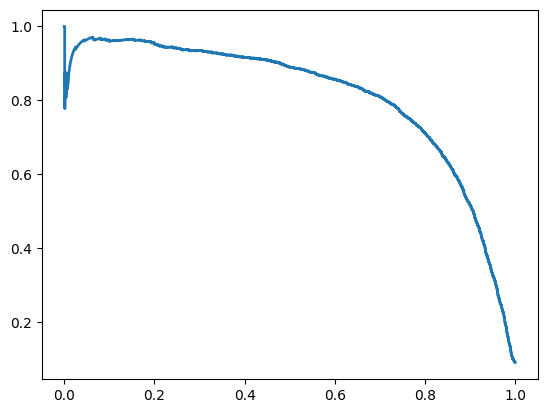

In [24]:
plt.plot(recalls,precisions,linewidth=2,label="precision/recall curve")
plt.show()

In [25]:
idx_for_90_precision=(precisions>=0.90).argmax()
threshold_for_90_precion=threshholds[idx_for_90_precision]
threshold_for_90_precion

3370.0194991439557

In [26]:
y_train_pred_90=(y_scores>=threshold_for_90_precion)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [27]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [28]:
recall_at_90_precision=recall_score(y_train_5,y_train_pred_90)
recall_at_90_precision

0.4799852425751706

## roc auc

In [29]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

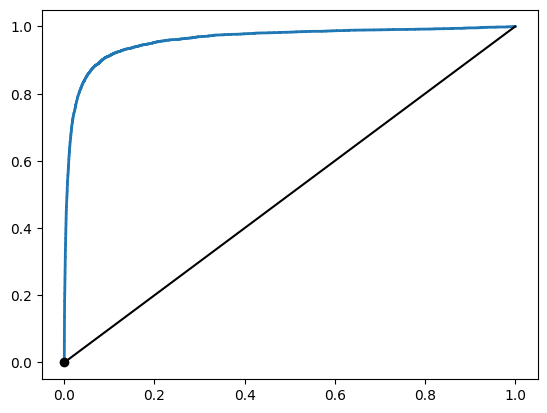

In [30]:
idx_for_threshold_at_90=(threshholds<=threshold_for_90_precion).argmax()
tpr_90,fpr_90=tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]


plt.plot(fpr,tpr,linewidth=2,label='roc curve')
plt.plot([0,1],[0,1],'k',label='random classifier roc curve')
plt.plot([fpr_90],'ko',label='threshhold for 90 %precision')
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_proba_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

In [33]:
y_proba_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [34]:
y_scores_forest=y_proba_forest[:,1]
precisions_forest,recalls_forest,thresholds_forest=precision_recall_curve(y_train_5,y_scores_forest)


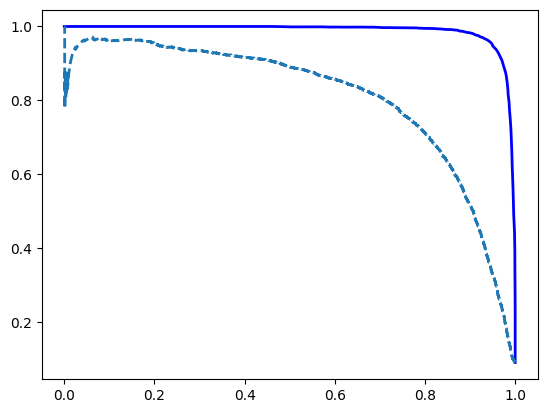

In [35]:
plt.plot(recalls_forest,precisions_forest,"b-",linewidth=2,label='random forest')
plt.plot(recalls,precisions,'--',linewidth=2,label='sgd')
plt.show()

In [36]:
y_train_pred_forest=y_proba_forest[:,1]>=0.5

## Multiclass classification

In [37]:
from sklearn.svm import SVC
svm_clf=SVC(random_state=42)
svm_clf.fit(x_train[:2000],y_train[:2000])

SVC(random_state=42)

In [38]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [39]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [40]:
class_id=some_digit_scores.argmax()
class_id

5

In [41]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [42]:
svm_clf.classes_[class_id]

'5'

In [43]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [44]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [45]:
len(ovr_clf.estimators_)

10

In [46]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])


array(['3'], dtype='<U1')

In [47]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [48]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype('float64'))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)


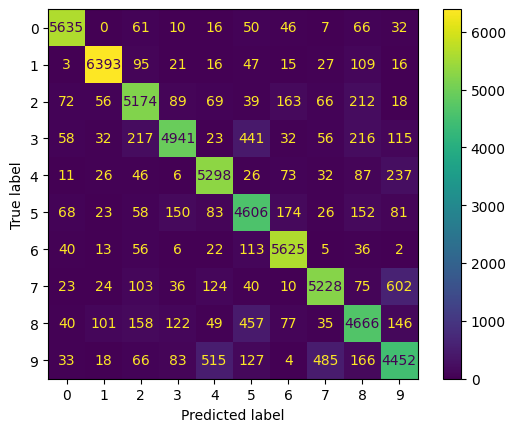

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

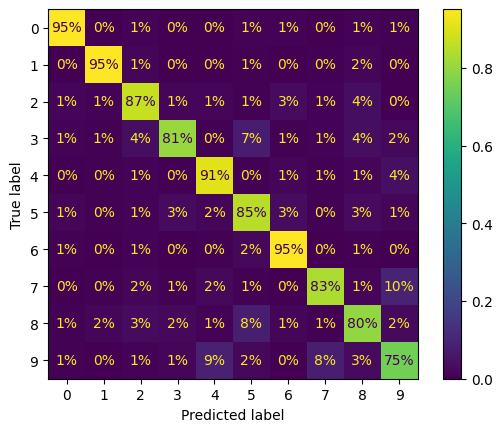

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',values_format='.0%')
plt.show()

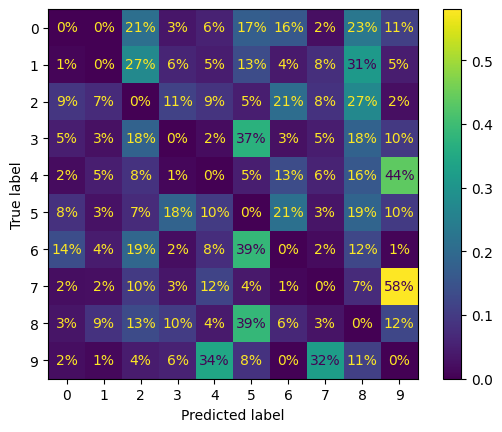

In [ ]:
sample_weight=(y_train_pred!=y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='true',sample_weight=sample_weight,values_format='.0%')
plt.show()

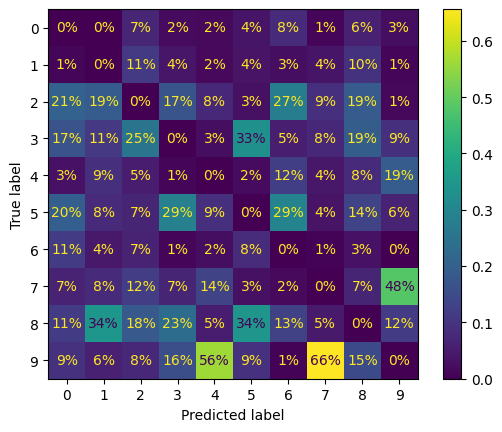

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize='pred',sample_weight=sample_weight,values_format='.0%')
plt.show()

In [ ]:
import nuympy as np
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
y_train_large=(y_train>='7')
y_train_odd=(y_train.astype("int8")%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_pred,average='macro')